

# Project: Investigate TMDb-Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This data set contains informationabout 10,000 movies collected fromThe Movie Database (TMDb),including user ratings and revenue. The dataset can be downloaded fromthis [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv.).

- Certain columns, like ‘cast’and ‘genres’, contain multiple values separated by pipe (|)characters.

- There are some odd charactersin the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.

- The final two columns endingwith “_adj” show the budget and revenue of the associated moviein terms of 2010 dollars,accounting for inflation overtime

- The dataset is downloaded and is stored in the file named `tmdb-movies.csv`
### Questions that can be posed:
1. Profits of each movie
2. Relation between profits and popularity
3. Relation between profits and votes_average
4. Profits per year
5. statistics of low revenue movies and high revenue movies.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb = pd.read_csv('tmdb-movies.csv')
tmdb.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09




### Data Cleaning (Replace this with more specific notes!)

Know the names of colums in the database and review which are necessary

In [4]:
tmdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

After looking at data, conclude which columns are unnecessary and drop them from the database

In [5]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
del_col = ['id','imdb_id','cast','homepage','director', 'tagline', 'keywords', 'overview','production_companies', 'release_date','budget_adj',
       'revenue_adj']

tmdb.drop(columns=del_col, inplace = True)

Check the details of the selected columns.

In [6]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 9 columns):
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
dtypes: float64(2), int64(5), object(2)
memory usage: 764.1+ KB


The ```budget``` and `revenue` columns shouldn't contain `0` they should be replaced with null values.

In [7]:
budget_cols = ['budget','revenue']

tmdb[budget_cols] = tmdb[budget_cols].replace(0,np.NaN)

Find out the duplicates in the database and remove them.

In [8]:
sum(tmdb.duplicated())

1

In [9]:
# check the no of rows and columns
tmdb.shape

(10866, 9)

In [10]:
tmdb.drop_duplicates(inplace = True)

In [11]:
# re-check the no of rows and columns
tmdb.shape

(10865, 9)

In [12]:
tmdb.head()

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015


Drop all the null values in the databsae as we have necessary data for the selected columns.

In [13]:
tmdb.dropna(inplace = True)

In [14]:
tmdb.shape

(3854, 9)

<a id='eda'></a>
## Exploratory Data Analysis

### Calculating profits for each movie

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
tmdb['profit'] = tmdb['revenue']-tmdb['budget']

### Research Question-1:  Movies with maximum and minimum profit

In [16]:
def max_stats(col_name, string=""):
    max_index = tmdb[col_name].idxmax()
    max_info = tmdb.loc[max_index]
    print(string)
    return max_info

In [17]:
def min_stats(col_name, string=""):
    min_index = tmdb[col_name].idxmin()
    min_info = tmdb.loc[min_index]
    print(string)
    return min_info

In [18]:
max_stats('profit', 'Details of movie with maximum profit:')

Details of movie with maximum profit:


popularity                                         9.43277
budget                                            2.37e+08
revenue                                        2.78151e+09
original_title                                      Avatar
runtime                                                162
genres            Action|Adventure|Fantasy|Science Fiction
vote_count                                            8458
vote_average                                           7.1
release_year                                          2009
profit                                         2.54451e+09
Name: 1386, dtype: object

In [19]:
min_stats('profit', 'Details of movie with minimum profit:')

Details of movie with minimum profit:


popularity                                          0.25054
budget                                             4.25e+08
revenue                                         1.10876e+07
original_title                            The Warrior's Way
runtime                                                 100
genres            Adventure|Fantasy|Action|Western|Thriller
vote_count                                               74
vote_average                                            6.4
release_year                                           2010
profit                                         -4.13912e+08
Name: 2244, dtype: object

### Research Question-2: Movies with maximum and minimum Budget

In [20]:
max_stats('budget', 'Details of movie with maximum budget:')

Details of movie with maximum budget:


popularity                                          0.25054
budget                                             4.25e+08
revenue                                         1.10876e+07
original_title                            The Warrior's Way
runtime                                                 100
genres            Adventure|Fantasy|Action|Western|Thriller
vote_count                                               74
vote_average                                            6.4
release_year                                           2010
profit                                         -4.13912e+08
Name: 2244, dtype: object

In [21]:
min_stats('budget', 'Details of movie with maximum budget:')

Details of movie with maximum budget:


popularity              0.090186
budget                         1
revenue                      100
original_title      Lost & Found
runtime                       95
genres            Comedy|Romance
vote_count                    14
vote_average                 4.8
release_year                1999
profit                        99
Name: 2618, dtype: object

### Research Question-3:  Movies with Revenue Loss

In [22]:
df = tmdb.query('profit < 0')
df

,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,profit
57,2.575711,60000000.0,30418560.0,Mortdecai,106,Comedy|Adventure,696,5.3,2015,-29581440.0
59,2.550747,70000000.0,17752940.0,Blackhat,133,Mystery|Crime|Action|Thriller|Drama,584,5.0,2015,-52247060.0
66,2.345821,100000000.0,93820758.0,In the Heart of the Sea,122,Thriller|Drama|Adventure|Action|History,805,6.4,2015,-6179242.0
73,2.234573,150000000.0,128388320.0,Pan,111,Adventure|Family|Fantasy,586,5.9,2015,-21611680.0
84,2.026651,11000000.0,1863315.0,Tracers,94,Action|Crime|Drama,326,5.9,2015,-9136685.0
87,1.980039,4000000.0,187112.0,Maggie,95,Horror,384,5.1,2015,-3812888.0
89,1.956320,50000000.0,3324330.0,Child 44,137,Crime|Thriller,341,5.9,2015,-46675670.0
106,1.499614,15000000.0,14860766.0,Scouts Guide to the Zombie Apocalypse,93,Comedy|Horror,288,6.2,2015,-139234.0
109,1.449072,8900000.0,50136.0,Heist,93,Crime|Action|Thriller,233,5.4,2015,-8849864.0
111,1.443406,20000000.0,208588.0,Dark Places,113,Drama|Mystery|Thriller,322,5.7,2015,-19791412.0


### Research Question-4: Movies with maximum and minimum Runtime

In [23]:
max_stats('runtime', 'Details of movie with maximum runtime:')

Details of movie with maximum runtime:


popularity                            0.534192
budget                                 1.8e+07
revenue                                 871279
original_title                          Carlos
runtime                                    338
genres            Crime|Drama|Thriller|History
vote_count                                  35
vote_average                               6.2
release_year                              2010
profit                            -1.71287e+07
Name: 2107, dtype: object

In [24]:
min_stats('runtime', 'Details of movie with minimum runtime:')

Details of movie with minimum runtime:


popularity                         0.208637
budget                                   10
revenue                                   5
original_title                  Kid's Story
runtime                                  15
genres            Science Fiction|Animation
vote_count                               16
vote_average                            6.8
release_year                           2003
profit                                   -5
Name: 5162, dtype: object

### Research Question-5: Average runtime of movies

In [25]:
print(tmdb['runtime'].mean())

109.220290607


### Research Question-6: Average runtime of movies with year

In [26]:
average_runtime_year = tmdb.groupby('release_year')['runtime'].mean()

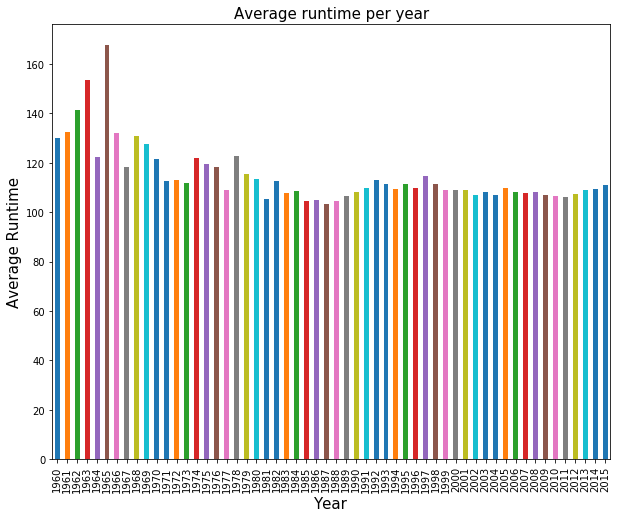

In [27]:
average_runtime_year.plot.bar(figsize = (10,8))


plt.xlabel('Year', fontsize = 15)
#On y-axis 
plt.ylabel('Average Runtime', fontsize=15)
#Name of the graph
plt.title('Average runtime per year', fontsize=15)

plt.show()

The `average_runtime` is almost consistent in recent years an is around 110 minutes.

### Research Question-7: Runtime Vs popularity Scatterplot

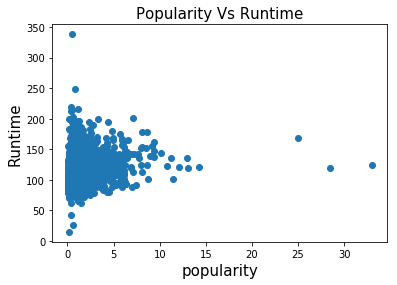

In [51]:
plt.scatter(x = tmdb['popularity'], y = tmdb['runtime'])
plt.xlabel('popularity', fontsize = 15)
#On y-axis 
plt.ylabel('Runtime', fontsize=15)
#Name of the graph
plt.title('Popularity Vs Runtime', fontsize=15)

plt.show()

There seems to be negligible correlation between `runtime` and `popularity`.

### Research Question-8: Runtime Vs Revenue Scatterplot

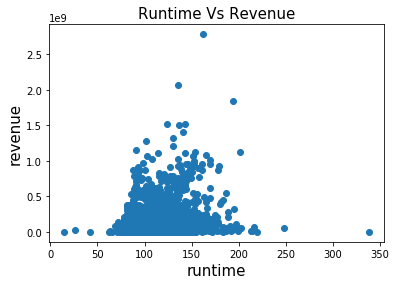

In [52]:
plt.scatter(y = tmdb['revenue'], x = tmdb['runtime'])
plt.xlabel('runtime', fontsize = 15)
#On y-axis 
plt.ylabel('revenue', fontsize=15)
#Name of the graph
plt.title('Runtime Vs Revenue', fontsize=15)

plt.show()

There seems to be a positive correlation between `runtime` and `revenue`.

### Research Question-9: Stats of low revenue and high revenue movies comparision

In [46]:
revenue_median = tmdb['revenue'].median()
low_revenue_df = tmdb[tmdb['revenue'] < revenue_median]
high_revenue_df = tmdb[tmdb['revenue'] >= revenue_median]

In [49]:
low_revenue_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,1927.000000,1.927000e+03,1.927000e+03,1927.000000,1927.000000,1927.000000,1927.000000,1.927000e+03
mean,0.656148,1.723235e+07,1.615659e+07,105.370005,167.638817,6.037987,1999.998962,-1.075762e+06
std,0.572377,1.942367e+07,1.320114e+07,18.462378,285.147655,0.824092,12.054523,2.017366e+07
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08
25%,0.323354,5.000000e+06,4.000560e+06,94.000000,35.000000,5.500000,1993.000000,-8.870422e+06
50%,0.519242,1.200000e+07,1.359691e+07,102.000000,79.000000,6.100000,2003.000000,-1.999970e+05
75%,0.806975,2.500000e+07,2.663112e+07,113.000000,182.000000,6.600000,2009.000000,9.664848e+06
max,7.192039,4.250000e+08,4.479322e+07,338.000000,5754.000000,8.400000,2015.000000,4.256441e+07


In [50]:
high_revenue_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,1927.000000,1.927000e+03,1.927000e+03,1927.000000,1927.000000,1927.000000,1927.000000,1.927000e+03
mean,1.726960,5.717504e+07,1.992166e+08,113.070576,887.801764,6.298339,2002.523093,1.420416e+08
std,1.857984,4.887321e+07,2.130962e+08,20.579587,1099.221948,0.742353,10.303412,1.863617e+08
min,0.010335,1.130000e+02,4.480678e+07,69.000000,13.000000,3.400000,1960.000000,-1.657101e+08
25%,0.787429,2.300000e+07,7.484447e+07,98.000000,230.000000,5.800000,1998.000000,4.355352e+07
50%,1.231579,4.200000e+07,1.242721e+08,110.000000,497.000000,6.300000,2005.000000,8.172336e+07
75%,2.008150,7.500000e+07,2.321503e+08,124.000000,1067.000000,6.800000,2010.000000,1.655408e+08
max,32.985763,3.800000e+08,2.781506e+09,248.000000,9767.000000,8.300000,2015.000000,2.544506e+09


- Low revenue movies has lower popularity than that of high revenuw movies.
- Average runtime is also higher for high revenue movies.

### Research Question-10 : Year Vs Total revenue in that year

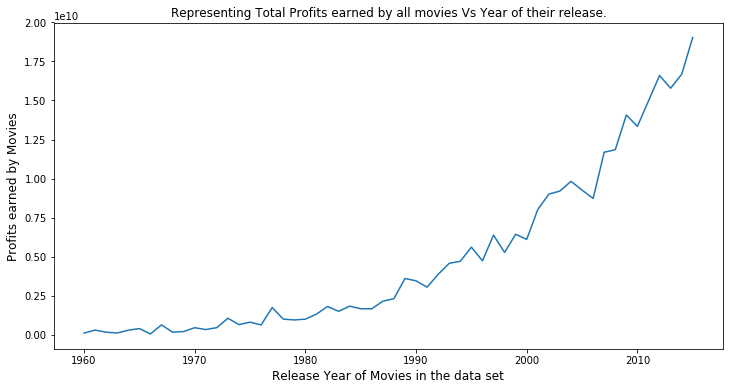

In [29]:
profits_year = tmdb.groupby('release_year')['profit'].sum()
#figure size(width, height)
plt.figure(figsize=(12,6))

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()


It can be observed from the graph that total profits movies per year are continously increasing over time.


### Research Question-11:  average popularity of movies over years

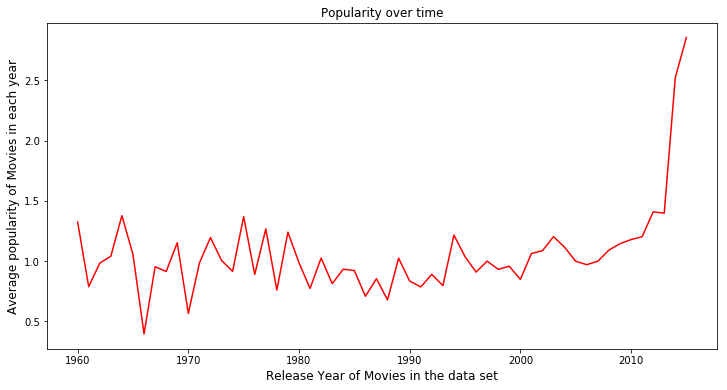

In [69]:
avg_year = tmdb.groupby('release_year')['popularity'].mean()
#figure size(width, height)
plt.figure(figsize=(12,6))

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Average popularity of Movies in each year', fontsize = 12)
#title of the line plot
plt.title('Popularity over time')

#plotting the graph
plt.plot(avg_year, 'r')
#displaying the line plot
plt.show()


The average popularity of movies made in a year is not consistant and is sometimes lowr/greater than that in previous year, but kept on incasing since 2010.

<a id='conclusions'></a>
## Conclusions
- Total profits movies per year are continously increasing over time.
- The average popularity of movies made in a year is not consistant and is sometimes lowr/greater than that in previous year, but kept on incasing since 2010. 
- There is no correlation between `runtime` and `popularity`
- There is a positive correlation between `runtime` and `revenue`
- The most profitable movies has higher popularity(rating)

### Limitations
- Some data is removed from the originl dataset, this will definitely have some impact on the conclusions here.
- The revenue currency should be specified for more clear inferences.
- `production_companies` should also be taken into consideration for more analysis on  popularity of movies.

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0